In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
import sklearn.datasets as skdatasets
from sklearn.model_selection import train_test_split

# Training a Softmax Linear Classifier

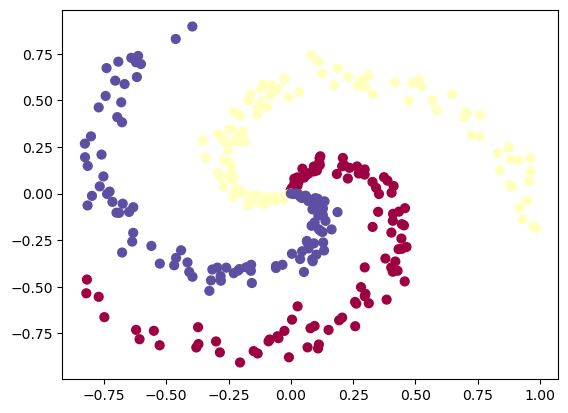

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

scores = np.dot(X, W) + b

num_examples = X.shape[0]
exp_scores = np.exp(scores)
probs = scores / np.sum(exp_scores, axis=1, keepdims=True)

In [6]:
print(scores.shape) 
print(num_examples)
print(exp_scores.shape)
print(probs.shape)

print(range(num_examples))

(300, 3)
300
(300, 3)
(300, 3)
range(0, 300)


In [11]:
reg = 0.01
step_size = 0.01

In [12]:
correct_logprobs = -np.log(probs[range(num_examples), y])

data_loss = np.sum(correct_logprobs) / num_examples

reg_loss = 0.5 * reg * np.sum(W * W)
loss = data_loss + reg_loss

C:\Users\Jihwan\AppData\Local\Temp\ipykernel_29472\272149614.py:1: RuntimeWarning: invalid value encountered in log
  correct_logprobs = -np.log(probs[range(num_examples), y])


In [13]:
dscores = probs
dscores[range(num_examples), y] -= 1
dscores /= num_examples

dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg * W

W += -step_size * dW
b += -step_size * db 

In [15]:
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1, K))

num_examples = X.shape[0]
for i in range(200):
    # evaluate class scores
    scores = np.dot(X, W) + b

    # compute class probabilities 
    exp_scores = np.exp(scores)
    probs = scores / np.sum(exp_scores, axis=1, keepdims=True)

    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W)
    loss = data_loss + reg_loss
    
    if i % 10 == 0:
        print("iteration %d, loss %f" % (i, loss))
    
    dscores = probs 
    dscores[range(num_examples), y] -= 1 
    dscores /= num_examples

    # backpropagate the gradient to the parameters (W, b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg * W

    W += -step_size * dW
    b += -step_size * db 

iteration 0, loss nan
iteration 10, loss 4.496785
iteration 20, loss 3.825755
iteration 30, loss 3.460501
iteration 40, loss 3.214437
iteration 50, loss 3.032459
iteration 60, loss 2.890440
iteration 70, loss 2.775632
iteration 80, loss 2.680486
iteration 90, loss 2.600164
iteration 100, loss 2.531385
iteration 110, loss 2.471826
iteration 120, loss 2.419783
iteration 130, loss 2.373973
iteration 140, loss 2.333406
iteration 150, loss 2.297305
iteration 160, loss 2.265048
iteration 170, loss 2.236132
iteration 180, loss 2.210142
iteration 190, loss 2.186735


C:\Users\Jihwan\AppData\Local\Temp\ipykernel_29472\444683733.py:13: RuntimeWarning: divide by zero encountered in log
  correct_logprobs = -np.log(probs[range(num_examples), y])
C:\Users\Jihwan\AppData\Local\Temp\ipykernel_29472\444683733.py:13: RuntimeWarning: invalid value encountered in log
  correct_logprobs = -np.log(probs[range(num_examples), y])


In [17]:
scores = np.dot(X, W) + b 
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y))) 

training accuracy: 0.52


# Training a Neural Network

In [ ]:
# One additional hidden layer 

h = 100 
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

step_size = 1e-0   
reg = 1e-3 

num_examples = X.shape[0]

for i in range(10000): 
    # evaluate class scores [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b)
    scores = np.dot(hidden_layer, W2) + b2 
    
    # compute the class probabilities 
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # compute the loss average cross-entropy loss and regularization 
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss 
    if i % 1000 == 0: 
        print("iteration %d: loss %f" %(i, loss))
    
    # compute the gradient on scores 
    dscores = probs 
    dscores[range(num_examples), y] -= 1 
    dscores /= num_examples

    # backpropagate the gradient to the parameters 
    